In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

as given in the descripton, many input values are required to be NA, bu here, pandas take them as empty, so correcting them below

In [4]:
df.Alley.isna()

0       True
1       True
2       True
3       True
4       True
        ... 
1455    True
1456    True
1457    True
1458    True
1459    True
Name: Alley, Length: 1460, dtype: bool

In [5]:
df2=df.fillna(value={"Alley": 'No Alley', "MasVnrType": 'No MasVnrType', 'BsmtQual': 'No Basement', 'BsmtCond': 'No Basement', 'BsmtExposure': 'No Basement', 'BsmtFinType1': 'No Basement', 'BsmtFinType2': 'No Basement', 'FireplaceQu': 'No Fireplace',  'GarageType': 'No Garage', 'GarageFinish': 'No Garage', 'GarageQual': 'No Garage', 'GarageCond': 'No Garage', 'PoolQC': 'No Pool', 'Fence': 'No Fence', 'MiscFeature': 'No Misc'})

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

removing NA of lot frontage 

In [7]:
df3=df2[~df2.LotFrontage.isna()]

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1201 non-null   int64  
 1   MSSubClass     1201 non-null   int64  
 2   MSZoning       1201 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1201 non-null   int64  
 5   Street         1201 non-null   object 
 6   Alley          1201 non-null   object 
 7   LotShape       1201 non-null   object 
 8   LandContour    1201 non-null   object 
 9   Utilities      1201 non-null   object 
 10  LotConfig      1201 non-null   object 
 11  LandSlope      1201 non-null   object 
 12  Neighborhood   1201 non-null   object 
 13  Condition1     1201 non-null   object 
 14  Condition2     1201 non-null   object 
 15  BldgType       1201 non-null   object 
 16  HouseStyle     1201 non-null   object 
 17  OverallQual    1201 non-null   int64  
 18  OverallC

analyzing MasVnrArea


In [9]:
df3[['MasVnrArea', 'MasVnrType']][df3['MasVnrArea'].isna()]

,MasVnrArea,MasVnrType
650,NaN,No MasVnrType
936,NaN,No MasVnrType
973,NaN,No MasVnrType
977,NaN,No MasVnrType
1243,NaN,No MasVnrType
1278,NaN,No MasVnrType


In [10]:
df3['MasVnrType'].value_counts()

None             728
BrkFace          339
Stone            119
BrkCmn             9
No MasVnrType      6
Name: MasVnrType, dtype: int64

from above its clear that MasVnrArea for null is the due to no MasVnrType

In [11]:
df4 = df3.fillna({'MasVnrArea': 'No MasVnrType'})

In [12]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1201 non-null   int64  
 1   MSSubClass     1201 non-null   int64  
 2   MSZoning       1201 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1201 non-null   int64  
 5   Street         1201 non-null   object 
 6   Alley          1201 non-null   object 
 7   LotShape       1201 non-null   object 
 8   LandContour    1201 non-null   object 
 9   Utilities      1201 non-null   object 
 10  LotConfig      1201 non-null   object 
 11  LandSlope      1201 non-null   object 
 12  Neighborhood   1201 non-null   object 
 13  Condition1     1201 non-null   object 
 14  Condition2     1201 non-null   object 
 15  BldgType       1201 non-null   object 
 16  HouseStyle     1201 non-null   object 
 17  OverallQual    1201 non-null   int64  
 18  OverallC

In [13]:
df4[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']][df4['GarageYrBlt'].isna()]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,No Garage,NaN,No Garage,0,0,No Garage,No Garage
48,No Garage,NaN,No Garage,0,0,No Garage,No Garage
78,No Garage,NaN,No Garage,0,0,No Garage,No Garage
88,No Garage,NaN,No Garage,0,0,No Garage,No Garage
89,No Garage,NaN,No Garage,0,0,No Garage,No Garage
...,...,...,...,...,...,...,...
1337,No Garage,NaN,No Garage,0,0,No Garage,No Garage
1349,No Garage,NaN,No Garage,0,0,No Garage,No Garage
1449,No Garage,NaN,No Garage,0,0,No Garage,No Garage
1450,No Garage,NaN,No Garage,0,0,No Garage,No Garage


In [14]:
df5 = df4.fillna({'GarageYrBlt': "No Garage"})

In [15]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1201 non-null   int64  
 1   MSSubClass     1201 non-null   int64  
 2   MSZoning       1201 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1201 non-null   int64  
 5   Street         1201 non-null   object 
 6   Alley          1201 non-null   object 
 7   LotShape       1201 non-null   object 
 8   LandContour    1201 non-null   object 
 9   Utilities      1201 non-null   object 
 10  LotConfig      1201 non-null   object 
 11  LandSlope      1201 non-null   object 
 12  Neighborhood   1201 non-null   object 
 13  Condition1     1201 non-null   object 
 14  Condition2     1201 non-null   object 
 15  BldgType       1201 non-null   object 
 16  HouseStyle     1201 non-null   object 
 17  OverallQual    1201 non-null   int64  
 18  OverallC

deleting 1 row where electrical is not defined

In [16]:
df6 = df5.dropna(axis=0)

In [17]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1200 non-null   int64  
 1   MSSubClass     1200 non-null   int64  
 2   MSZoning       1200 non-null   object 
 3   LotFrontage    1200 non-null   float64
 4   LotArea        1200 non-null   int64  
 5   Street         1200 non-null   object 
 6   Alley          1200 non-null   object 
 7   LotShape       1200 non-null   object 
 8   LandContour    1200 non-null   object 
 9   Utilities      1200 non-null   object 
 10  LotConfig      1200 non-null   object 
 11  LandSlope      1200 non-null   object 
 12  Neighborhood   1200 non-null   object 
 13  Condition1     1200 non-null   object 
 14  Condition2     1200 non-null   object 
 15  BldgType       1200 non-null   object 
 16  HouseStyle     1200 non-null   object 
 17  OverallQual    1200 non-null   int64  
 18  OverallC

In [18]:
out = df6.apply(lambda x:1 if ((x['GarageType']==x['GarageYrBlt']==x['GarageFinish']==x['GarageQual']==x['GarageCond']=='No Garage') and (x['GarageCars']==x['GarageArea']==0)) else '', axis=1)

In [19]:
out.value_counts()

     1126
1      74
dtype: int64

In [20]:
def val_count(df, column, value):
    try:
        print(f'{value} count in column {column}: {df[f"{column}"].value_counts()[{value}]}')
    except BaseException:
        return 

In [21]:
garage = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
value = 'No Garage'
for x in garage:
    val_count(df6, x, value)

No Garage count in column GarageType: No Garage    74
Name: GarageType, dtype: int64
No Garage count in column GarageYrBlt: No Garage    74
Name: GarageYrBlt, dtype: int64
No Garage count in column GarageFinish: No Garage    74
Name: GarageFinish, dtype: int64
No Garage count in column GarageQual: No Garage    74
Name: GarageQual, dtype: int64
No Garage count in column GarageCond: No Garage    74
Name: GarageCond, dtype: int64


In [22]:
garage_no = ['GarageCars', 'GarageArea']
value = 0
for x in garage_no:
    val_count(df6, x, value)

0 count in column GarageCars: 0    74
Name: GarageCars, dtype: int64
0 count in column GarageArea: 0    74
Name: GarageArea, dtype: int64


therefore all the nan values replaced were logical

In [23]:
out_basement = df6.apply(lambda x:1 if ((x['BsmtQual']==x['BsmtCond']==x['BsmtExposure']==x['BsmtFinType1']==x['BsmtFinType2']=='No Basement') )else '', axis=1)

In [24]:
out_basement.value_counts()

     1169
1      31
dtype: int64

In [25]:
basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
value = 'No Basement'
for x in basement:
    val_count(df6, x, value)

No Basement count in column BsmtQual: No Basement    31
Name: BsmtQual, dtype: int64
No Basement count in column BsmtCond: No Basement    31
Name: BsmtCond, dtype: int64
No Basement count in column BsmtExposure: No Basement    32
Name: BsmtExposure, dtype: int64
No Basement count in column BsmtFinType1: No Basement    31
Name: BsmtFinType1, dtype: int64
No Basement count in column BsmtFinType2: No Basement    32
Name: BsmtFinType2, dtype: int64


looking at the row for which values are not same

In [26]:
df6[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']][(df6['BsmtExposure']=='No Basement')&(df6['BsmtQual']!='No Basement')]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
948,Gd,TA,No Basement,Unf,Unf


In [27]:
df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']][df['BsmtExposure'].isna()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [28]:
df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']][df['BsmtExposure'] == 'No']

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,Gd,TA,No,GLQ,Unf
3,TA,Gd,No,ALQ,Unf
5,Gd,TA,No,GLQ,Unf
8,TA,TA,No,Unf,Unf
9,TA,TA,No,GLQ,Unf
...,...,...,...,...,...
1454,Gd,TA,No,GLQ,Unf
1455,Gd,TA,No,Unf,Unf
1456,Gd,TA,No,ALQ,Rec
1457,TA,Gd,No,GLQ,Unf


we understand that in df6, for this pecific we can change the BsmtExposure to No, as all other parameters are present and it was initially Nan

In [29]:
df6.loc[948, 'BsmtExposure'] = 'No'

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [30]:
df6.loc[948, 'BsmtExposure'] 

'No'

In [31]:
df6[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']][(df6['BsmtFinType2']=='No Basement')&(df6['BsmtQual']!='No Basement')]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
332,Gd,TA,No,GLQ,No Basement


In [32]:
df6[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']][(df6['BsmtFinType2']!='No Basement')&((df6['BsmtFinType1']!='No Basement'))]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,Gd,TA,No,GLQ,Unf
1,Gd,TA,Gd,ALQ,Unf
2,Gd,TA,Mn,GLQ,Unf
3,TA,Gd,No,ALQ,Unf
4,Gd,TA,Av,GLQ,Unf
...,...,...,...,...,...
1455,Gd,TA,No,Unf,Unf
1456,Gd,TA,No,ALQ,Rec
1457,TA,Gd,No,GLQ,Unf
1458,TA,TA,Mn,GLQ,Rec


removing row with index 332 as the BsmtFinType2 at that row which was Nan cannot decide

In [33]:
df7=df6.drop(index=332, axis=0)

In [34]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1199 non-null   int64  
 1   MSSubClass     1199 non-null   int64  
 2   MSZoning       1199 non-null   object 
 3   LotFrontage    1199 non-null   float64
 4   LotArea        1199 non-null   int64  
 5   Street         1199 non-null   object 
 6   Alley          1199 non-null   object 
 7   LotShape       1199 non-null   object 
 8   LandContour    1199 non-null   object 
 9   Utilities      1199 non-null   object 
 10  LotConfig      1199 non-null   object 
 11  LandSlope      1199 non-null   object 
 12  Neighborhood   1199 non-null   object 
 13  Condition1     1199 non-null   object 
 14  Condition2     1199 non-null   object 
 15  BldgType       1199 non-null   object 
 16  HouseStyle     1199 non-null   object 
 17  OverallQual    1199 non-null   int64  
 18  OverallC

In [35]:
df7['MiscVal'][df7['MiscFeature']=='No Misc'].value_counts()

0    1160
Name: MiscVal, dtype: int64

In [36]:
(df7['MiscFeature']=='No Misc').value_counts()

True     1160
False      39
Name: MiscFeature, dtype: int64

In [37]:
df7.duplicated().value_counts()

False    1199
dtype: int64

In [38]:
cor = df7.corr()[(abs(df7.corr()>0.7)) & (df7.corr()!=1)]

In [39]:
cor.dropna(axis=0, how='all').dropna(axis=1, how='all')

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802133
TotalBsmtSF,NaN,NaN,0.836335,NaN,NaN,NaN,NaN,NaN
1stFlrSF,NaN,0.836335,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,NaN,NaN,0.828712,NaN,NaN,0.703784
TotRmsAbvGrd,NaN,NaN,NaN,0.828712,NaN,NaN,NaN,NaN
GarageCars,NaN,NaN,NaN,NaN,NaN,NaN,0.890021,NaN
GarageArea,NaN,NaN,NaN,NaN,NaN,0.890021,NaN,NaN
SalePrice,0.802133,NaN,NaN,0.703784,NaN,NaN,NaN,NaN


here, we can see many highly correlated columns, removing following columns
- OverallQual
- 1stFlrSF
- GrLivArea
- GarageCars

In [40]:
df8 = df7.drop(columns=['OverallQual', '1stFlrSF', 'GrLivArea', 'GarageCars'])

In [41]:
df8.BsmtFullBath.value_counts()

0    722
1    463
2     13
3      1
Name: BsmtFullBath, dtype: int64

dropping id and converting columns to correct datatype


In [42]:
df9 = df8.drop(columns=['Id'])

In [43]:
df10=df9.astype({'MSSubClass': 'object', 'OverallCond': 'object', 'YrSold': 'object', 'MoSold': 'object'})

<AxesSubplot:>

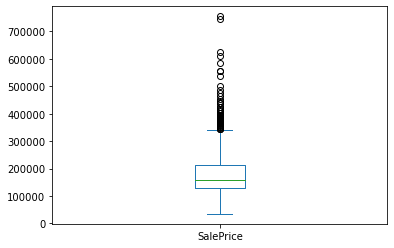

In [44]:
df10.SalePrice.plot.box()

<AxesSubplot:>

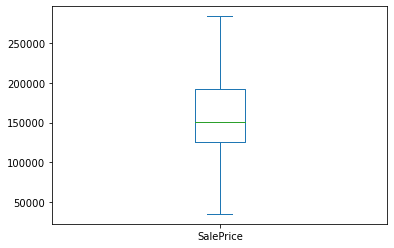

In [45]:
df10[df10['SalePrice']<df10.SalePrice.quantile(0.90)].SalePrice.plot.box()

removing the extreme values

In [46]:
df11 = df10[df10['SalePrice']<df10.SalePrice.quantile(0.90)]

In [47]:
df11.shape

(1078, 76)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(1, 0, 'LotFrontage'),
  Text(2, 0, 'LotArea'),
  Text(3, 0, 'YearBuilt'),
  Text(4, 0, 'YearRemodAdd'),
  Text(5, 0, 'BsmtFinSF1'),
  Text(6, 0, 'BsmtFinSF2'),
  Text(7, 0, 'BsmtUnfSF'),
  Text(8, 0, 'TotalBsmtSF'),
  Text(9, 0, '2ndFlrSF'),
  Text(10, 0, 'LowQualFinSF'),
  Text(11, 0, 'BsmtFullBath'),
  Text(12, 0, 'BsmtHalfBath'),
  Text(13, 0, 'FullBath'),
  Text(14, 0, 'HalfBath'),
  Text(15, 0, 'BedroomAbvGr'),
  Text(16, 0, 'KitchenAbvGr'),
  Text(17, 0, 'TotRmsAbvGrd'),
  Text(18, 0, 'Fireplaces'),
  Text(19, 0, 'GarageArea'),
  Text(20, 0, 'WoodDeckSF'),
  Text(21, 0, 'OpenPorchSF'),
  Text(22, 0, 'EnclosedPorch'),
  Text(23, 0, '3SsnPorch'),
  Text(24, 0, 'ScreenPorch'),
  Text(25, 0, 'PoolArea'),
  Text(26, 0, 'MiscVal'),
  Text(27, 0, 'SalePrice')])

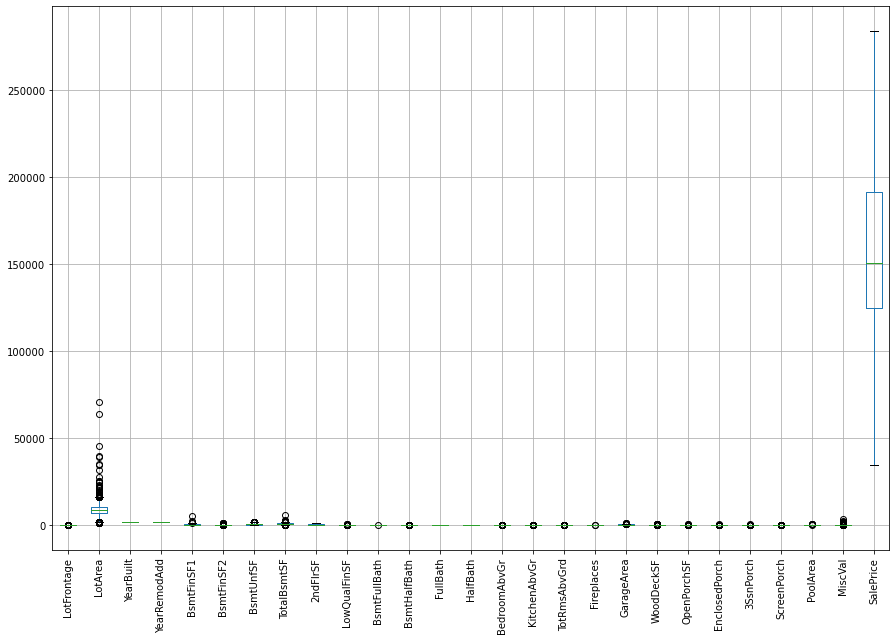

In [48]:
plt.figure(figsize=(15, 10))
df11[df11.describe().columns[:32]].boxplot()
plt.xticks(rotation=90)

looking at LotArea

<AxesSubplot:>

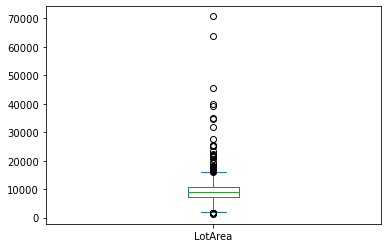

In [49]:
df11.LotArea.plot.box()

<AxesSubplot:>

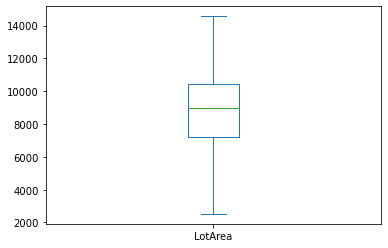

In [50]:
df11[(df11.LotArea<df11.LotArea.quantile(0.94))&(df11.LotArea>df11.LotArea.quantile(0.035))]['LotArea'].plot.box()

In [51]:
df12 = df11[(df11.LotArea<df11.LotArea.quantile(0.94))&(df11.LotArea>df11.LotArea.quantile(0.035))]

In [52]:
df12.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,...,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,67.987692,8819.228718,1967.117949,1983.277949,364.794872,41.052308,581.035897,986.883077,303.834872,6.268718,...,0.480000,439.668718,78.089231,40.988718,26.150769,3.209231,13.326154,1.255385,28.773333,159196.895385
std,18.149161,2500.038265,31.775933,21.545751,374.518211,143.896139,428.212806,357.733377,394.160406,48.714898,...,0.588528,200.455149,112.721018,60.955759,63.944365,29.563097,51.776632,27.751897,199.795863,49750.377717
min,24.000000,2522.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.500000,7216.500000,1946.000000,1962.000000,0.000000,0.000000,249.000000,777.000000,0.000000,0.000000,...,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125000.000000
50%,67.000000,8960.000000,1968.000000,1992.000000,320.000000,0.000000,510.000000,950.000000,0.000000,0.000000,...,0.000000,461.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150750.000000
75%,79.000000,10440.000000,1999.000000,2003.500000,643.500000,0.000000,831.500000,1200.000000,689.000000,0.000000,...,1.000000,556.000000,144.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190000.000000
max,182.000000,14572.000000,2009.000000,2010.000000,1880.000000,1127.000000,2042.000000,2524.000000,1611.000000,515.000000,...,3.000000,1390.000000,736.000000,547.000000,386.000000,508.000000,480.000000,648.000000,3500.000000,284000.000000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(1, 0, 'LotFrontage'),
  Text(2, 0, 'LotArea'),
  Text(3, 0, 'YearBuilt'),
  Text(4, 0, 'YearRemodAdd'),
  Text(5, 0, 'BsmtFinSF1'),
  Text(6, 0, 'BsmtFinSF2'),
  Text(7, 0, 'BsmtUnfSF'),
  Text(8, 0, 'TotalBsmtSF'),
  Text(9, 0, '2ndFlrSF'),
  Text(10, 0, 'LowQualFinSF'),
  Text(11, 0, 'BsmtFullBath'),
  Text(12, 0, 'BsmtHalfBath'),
  Text(13, 0, 'FullBath'),
  Text(14, 0, 'HalfBath'),
  Text(15, 0, 'BedroomAbvGr'),
  Text(16, 0, 'KitchenAbvGr'),
  Text(17, 0, 'TotRmsAbvGrd'),
  Text(18, 0, 'Fireplaces'),
  Text(19, 0, 'GarageArea'),
  Text(20, 0, 'WoodDeckSF'),
  Text(21, 0, 'OpenPorchSF'),
  Text(22, 0, 'EnclosedPorch'),
  Text(23, 0, '3SsnPorch'),
  Text(24, 0, 'ScreenPorch'),
  Text(25, 0, 'PoolArea'),
  Text(26, 0, 'MiscVal'),
  Text(27, 0, 'SalePrice')])

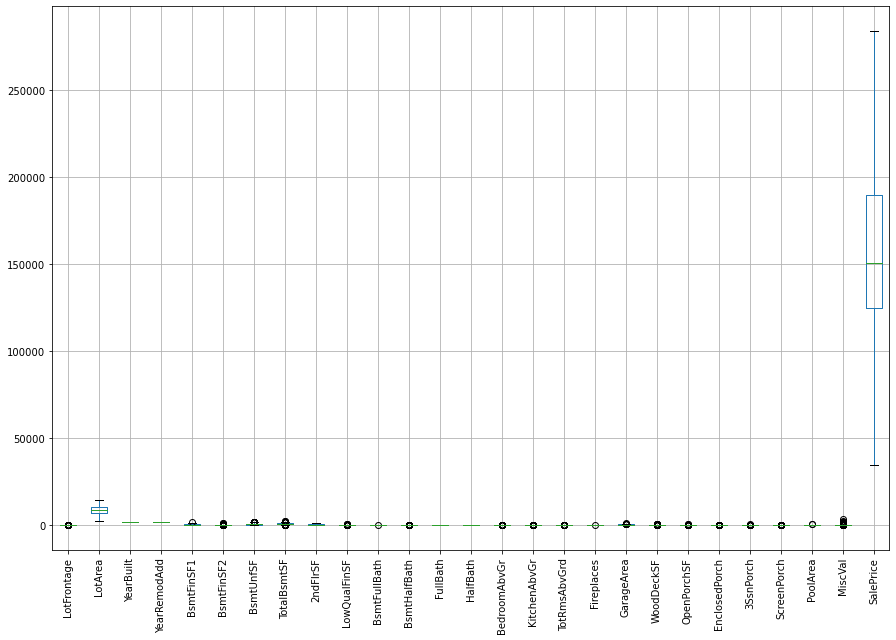

In [53]:
plt.figure(figsize=(15, 10))
df12[df12.describe().columns[:32]].boxplot()
plt.xticks(rotation=90)

<AxesSubplot:>

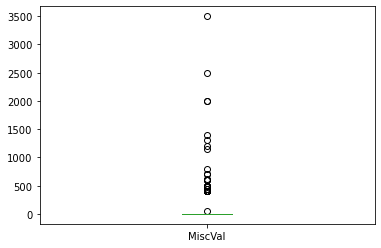

In [54]:
df12.MiscVal.plot.box()

dropping MiscVal column as there are is no specific population to work on, and so, dropping MiscFeature, PoolQC, MiscFeature, PoolArea as the values re very less to work on

In [55]:
df13 = df12.drop(columns=['MiscVal', 'MiscFeature', 'PoolQC', 'MiscFeature', 'PoolArea'])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23]),
 [Text(1, 0, 'YearBuilt'),
  Text(2, 0, 'YearRemodAdd'),
  Text(3, 0, 'BsmtFinSF1'),
  Text(4, 0, 'BsmtFinSF2'),
  Text(5, 0, 'BsmtUnfSF'),
  Text(6, 0, 'TotalBsmtSF'),
  Text(7, 0, '2ndFlrSF'),
  Text(8, 0, 'LowQualFinSF'),
  Text(9, 0, 'BsmtFullBath'),
  Text(10, 0, 'BsmtHalfBath'),
  Text(11, 0, 'FullBath'),
  Text(12, 0, 'HalfBath'),
  Text(13, 0, 'BedroomAbvGr'),
  Text(14, 0, 'KitchenAbvGr'),
  Text(15, 0, 'TotRmsAbvGrd'),
  Text(16, 0, 'Fireplaces'),
  Text(17, 0, 'GarageArea'),
  Text(18, 0, 'WoodDeckSF'),
  Text(19, 0, 'OpenPorchSF'),
  Text(20, 0, 'EnclosedPorch'),
  Text(21, 0, '3SsnPorch'),
  Text(22, 0, 'ScreenPorch'),
  Text(23, 0, 'SalePrice')])

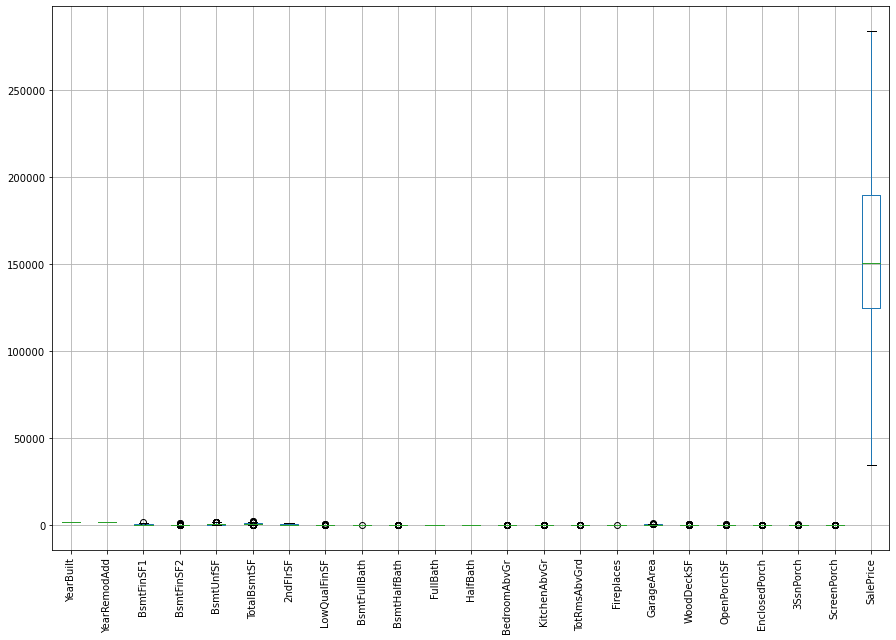

In [56]:
plt.figure(figsize=(15, 10))
df13[df13.describe().columns[2:25]].boxplot()
plt.xticks(rotation=90)

<AxesSubplot:>

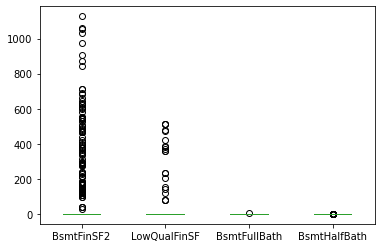

In [57]:
df13[['BsmtFinSF2', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', ]].plot.box()

In [58]:
df13.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,...,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,67.987692,8819.228718,1967.117949,1983.277949,364.794872,41.052308,581.035897,986.883077,303.834872,6.268718,...,1.062564,6.305641,0.480000,439.668718,78.089231,40.988718,26.150769,3.209231,13.326154,159196.895385
std,18.149161,2500.038265,31.775933,21.545751,374.518211,143.896139,428.212806,357.733377,394.160406,48.714898,...,0.254696,1.437585,0.588528,200.455149,112.721018,60.955759,63.944365,29.563097,51.776632,49750.377717
min,24.000000,2522.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.500000,7216.500000,1946.000000,1962.000000,0.000000,0.000000,249.000000,777.000000,0.000000,0.000000,...,1.000000,5.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125000.000000
50%,67.000000,8960.000000,1968.000000,1992.000000,320.000000,0.000000,510.000000,950.000000,0.000000,0.000000,...,1.000000,6.000000,0.000000,461.000000,0.000000,17.000000,0.000000,0.000000,0.000000,150750.000000
75%,79.000000,10440.000000,1999.000000,2003.500000,643.500000,0.000000,831.500000,1200.000000,689.000000,0.000000,...,1.000000,7.000000,1.000000,556.000000,144.000000,60.000000,0.000000,0.000000,0.000000,190000.000000
max,182.000000,14572.000000,2009.000000,2010.000000,1880.000000,1127.000000,2042.000000,2524.000000,1611.000000,515.000000,...,3.000000,14.000000,3.000000,1390.000000,736.000000,547.000000,386.000000,508.000000,480.000000,284000.000000


as its clear from describe and box plot, we can drop following columns as they are of outliers
['BsmtFinSF2', '2ndFlrSF', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch']

In [59]:
df14 = df13.drop(columns=['BsmtFinSF2', '2ndFlrSF', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'YearBuilt'),
  Text(2, 0, 'YearRemodAdd'),
  Text(3, 0, 'BsmtFinSF1'),
  Text(4, 0, 'BsmtUnfSF'),
  Text(5, 0, 'TotalBsmtSF'),
  Text(6, 0, 'LowQualFinSF'),
  Text(7, 0, 'BsmtFullBath'),
  Text(8, 0, 'BsmtHalfBath'),
  Text(9, 0, 'FullBath'),
  Text(10, 0, 'HalfBath'),
  Text(11, 0, 'BedroomAbvGr'),
  Text(12, 0, 'KitchenAbvGr'),
  Text(13, 0, 'TotRmsAbvGrd'),
  Text(14, 0, 'Fireplaces'),
  Text(15, 0, 'GarageArea'),
  Text(16, 0, 'OpenPorchSF')])

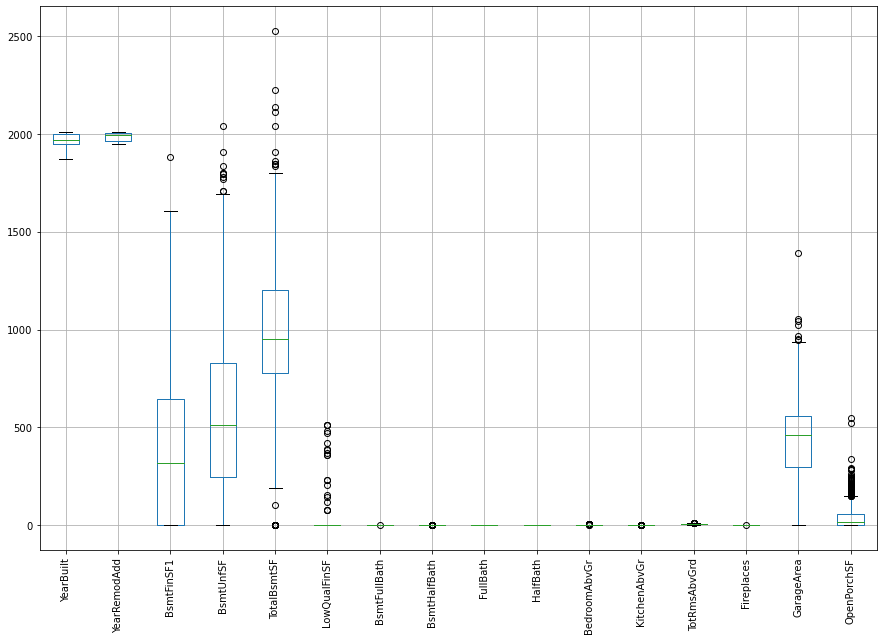

In [60]:
plt.figure(figsize=(15, 10))
df14[df14.describe().columns[2:18]].boxplot()
plt.xticks(rotation=90)

In [61]:
df14.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,SalePrice
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,67.987692,8819.228718,1967.117949,1983.277949,364.794872,581.035897,986.883077,6.268718,0.365128,0.058462,1.504615,0.323077,2.847179,1.062564,6.305641,0.480000,439.668718,40.988718,159196.895385
std,18.149161,2500.038265,31.775933,21.545751,374.518211,428.212806,357.733377,48.714898,0.502575,0.243325,0.526241,0.489343,0.779768,0.254696,1.437585,0.588528,200.455149,60.955759,49750.377717
min,24.000000,2522.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.500000,7216.500000,1946.000000,1962.000000,0.000000,249.000000,777.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,300.000000,0.000000,125000.000000
50%,67.000000,8960.000000,1968.000000,1992.000000,320.000000,510.000000,950.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,461.000000,17.000000,150750.000000
75%,79.000000,10440.000000,1999.000000,2003.500000,643.500000,831.500000,1200.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,556.000000,60.000000,190000.000000
max,182.000000,14572.000000,2009.000000,2010.000000,1880.000000,2042.000000,2524.000000,515.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,1390.000000,547.000000,284000.000000


further removing, ['LowQualFinSF', 'BsmtHalfBath', 'BsmtFullBath', 'HalfBath', 'Fireplaces', 'OpenPorchSF']

In [62]:
df15 = df14.drop(columns= ['LowQualFinSF', 'BsmtHalfBath', 'BsmtFullBath', 'HalfBath', 'Fireplaces', 'OpenPorchSF'])

In [63]:
categorical = df15.select_dtypes(include=['object'])

In [64]:
categorical

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2003.0,RFn,TA,TA,Y,No Fence,2,2008,WD,Normal
1,20,RL,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,1976.0,RFn,TA,TA,Y,No Fence,5,2007,WD,Normal
2,60,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2001.0,RFn,TA,TA,Y,No Fence,9,2008,WD,Normal
3,70,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1998.0,Unf,TA,TA,Y,No Fence,2,2006,WD,Abnorml
4,60,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,2000.0,RFn,TA,TA,Y,No Fence,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,1999.0,RFn,TA,TA,Y,No Fence,8,2007,WD,Normal
1456,20,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,1978.0,Unf,TA,TA,Y,MnPrv,2,2010,WD,Normal
1457,70,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,1941.0,RFn,TA,TA,Y,GdPrv,5,2010,WD,Normal
1458,20,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,1950.0,Unf,TA,TA,Y,No Fence,4,2010,WD,Normal


In [65]:
def val_count(df, column):
    print(df[column].value_counts(normalize =True))

In [66]:
for x in categorical.columns:
    val_count(categorical, x)

20     0.364103
60     0.166154
50     0.120000
30     0.063590
120    0.060513
70     0.048205
90     0.047179
80     0.035897
190    0.025641
160    0.025641
85     0.014359
45     0.012308
75     0.010256
40     0.003077
180    0.003077
Name: MSSubClass, dtype: float64
RL         0.757949
RM         0.169231
FV         0.050256
RH         0.013333
C (all)    0.009231
Name: MSZoning, dtype: float64
Pave    0.996923
Grvl    0.003077
Name: Street, dtype: float64
No Alley    0.915897
Grvl        0.047179
Pave        0.036923
Name: Alley, dtype: float64
Reg    0.744615
IR1    0.238974
IR2    0.014359
IR3    0.002051
Name: LotShape, dtype: float64
Lvl    0.913846
Bnk    0.051282
HLS    0.027692
Low    0.007179
Name: LandContour, dtype: float64
AllPub    1.0
Name: Utilities, dtype: float64
Inside     0.774359
Corner     0.171282
FR2        0.028718
CulDSac    0.022564
FR3        0.003077
Name: LotConfig, dtype: float64
Gtl    0.964103
Mod    0.033846
Sev    0.002051
Name: LandSlope, dtype:

from above value counts, we found, following columns to be insignificant in analysis as they donot have enough diversity:
['Street', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'MasVnrArea', 'RoofStyle', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'GarageQual', 'GarageCond', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition', 'Fence', 'GarageYrBlt'] 

In [67]:
df16 = df15.drop(columns=['Street', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'MasVnrArea', 'RoofStyle', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'GarageQual', 'GarageCond', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition', 'Fence', 'GarageYrBlt'] )

In [68]:
df16.shape

(975, 32)

In [69]:
main = pd.get_dummies(df16, drop_first=True)

In [70]:
corr_out = main.corr()[(abs(main.corr()>0.7)) & (main.corr()!=1)].dropna(axis=0, how='all').dropna(axis=1, how='all')

In [71]:
corr_out.count()

MSSubClass_45               1
MSSubClass_60               1
MSSubClass_75               1
MSSubClass_80               1
MSSubClass_85               1
HouseStyle_1.5Unf           1
HouseStyle_2.5Unf           1
HouseStyle_2Story           1
HouseStyle_SFoyer           1
HouseStyle_SLvl             1
Exterior1st_BrkFace         1
Exterior1st_HdBoard         1
Exterior1st_MetalSd         1
Exterior1st_Plywood         1
Exterior1st_Stucco          1
Exterior1st_VinylSd         1
Exterior1st_Wd Sdng         1
Exterior2nd_BrkFace         1
Exterior2nd_HdBoard         1
Exterior2nd_MetalSd         1
Exterior2nd_Plywood         1
Exterior2nd_Stucco          1
Exterior2nd_VinylSd         1
Exterior2nd_Wd Sdng         1
Foundation_Slab             3
BsmtQual_No Basement        1
BsmtExposure_No Basement    1
BsmtFinType1_No Basement    1
dtype: int64

In [72]:
corr_out = corr_out.drop(columns=['Foundation_Slab'], index=['Foundation_Slab'])

In [73]:
corr_out[corr_out.count()>0].index

Index(['MSSubClass_45', 'MSSubClass_60', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Unf',
       'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'Exterior1st_BrkFace', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_BrkFace', 'Exterior2nd_HdBoard',
       'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng'],
      dtype='object')

In [74]:
def remov_col(df):
    l=[]
    while df[df.count()>0].shape[0]:
        column = df[df.count()>0].index[0]
        df = df.drop(columns = [column], index = [column])
        l.append(column)
    return l

In [75]:
col_list = remov_col(corr_out)

In [76]:
col_list

['MSSubClass_45',
 'MSSubClass_60',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'Exterior1st_BrkFace',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng']

In [77]:
col_list.append('Foundation_Slab')

In [78]:
main1 = main.drop(columns=col_list)

dropping correlated columns

In [79]:
main1.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,FullBath,BedroomAbvGr,KitchenAbvGr,...,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,65.0,8450,2003,2003,706,150,856,2,3,1,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,1976,1976,978,284,1262,2,3,1,...,0,0,0,0,0,0,1,0,0,0
2,68.0,11250,2001,2002,486,434,920,2,3,1,...,0,0,1,0,0,0,0,1,0,0
3,60.0,9550,1915,1970,216,540,756,1,3,1,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,2000,2000,655,490,1145,2,4,1,...,0,0,0,0,0,1,0,1,0,0


### Rescaling features


In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [81]:
main1[main1.columns] = scaler.fit_transform(main1[main1.columns])

# Ridge and Lasso Regression 

In [84]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### splitting into train and test

In [85]:
np.random.seed(0)
df_train, df_test = train_test_split(main1, train_size = 0.7, random_state=100)

In [86]:
print(df_train.shape, df_test.shape)

(682, 140) (293, 140)


In [87]:
X_train, y_train = df_train.drop(columns = ['SalePrice']), df_train[['SalePrice']]

In [88]:
X_test, y_test = df_test.drop(columns = ['SalePrice']), df_test[['SalePrice']]

## Preaparing functons for regression 

In [89]:
def cross_val(estimator, x_dataset, y_dataset):
    params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
     0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
     4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
    folds = 5
    model = GridSearchCV(estimator = estimator, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
    return model.fit(x_dataset, y_dataset)

In [90]:
def model_metrices(model, x_dataset_train, y_dataset_train, x_dataset_test, y_dataset_test):
    y_pred_train = model.predict(x_dataset_train)
    y_pred_test = model.predict(x_dataset_test)
    
    y_pred_train = y_pred_train.reshape(y_dataset_train.shape)
    y_pred_test = y_pred_test.reshape(y_dataset_test.shape)

    metrice = []
    r2_train_lr = r2_score(y_dataset_train, y_pred_train)
    print(r2_train_lr)
    metrice.append(r2_train_lr)

    r2_test_lr = r2_score(y_dataset_test, y_pred_test)
    print(r2_test_lr)
    metrice.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_dataset_train - y_pred_train))
    print(rss1_lr)
    metrice.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_dataset_test - y_pred_test))
    print(rss2_lr)
    metrice.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_dataset_train, y_pred_train)
    print(mse_train_lr)
    metrice.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_dataset_test, y_pred_test)
    print(mse_test_lr)
    metrice.append(mse_test_lr**0.5)
    
    return metrice


###  Ridge Regression

In [91]:
ridge = Ridge()

model_ridge = cross_val(ridge, X_train, y_train)

print(model_ridge.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 1.0}


In [92]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[[ 3.25607349e-02  1.07193636e-01  1.51767993e-01  3.67138742e-02
   9.41569007e-02  2.33786105e-02  2.93663261e-01  8.59345745e-02
   6.17294662e-02 -5.00281384e-02  1.12966659e-01  1.41789018e-01
  -1.87713410e-02 -3.98197571e-02 -8.28812464e-03  2.61317009e-03
  -4.00966673e-02 -1.28379312e-02 -8.47593597e-02  5.31262838e-03
  -3.44669223e-02  1.70160534e-02 -1.93563752e-02 -1.14727275e-02
   9.06251383e-02 -2.42639423e-02 -5.41245863e-02 -6.09228650e-02
  -6.43604074e-02 -7.60773584e-03 -7.02860337e-04  7.24392259e-03
  -4.11029770e-03  7.70761889e-02  4.47504558e-02 -2.68376434e-02
   5.09245860e-03 -5.00049992e-03 -1.88760577e-04  6.07889789e-02
   8.39193716e-02 -1.64549026e-02  3.73224177e-02 -4.40242095e-02
  -5.43587549e-02  2.73331534e-02  7.36189164e-03  3.38877120e-02
  -6.70085232e-02 -4.67948495e-02 -6.72139970e-02 -1.60246570e-02
   7.50169630e-03  2.90091857e-02  5.07656256e-02  5.03469213e-02
   5.67740616e-02  0.00000000e+00  1.57176769e-02 -9.49261462e-04
   1.60521

In [93]:
metrice_ridge = model_metrices(ridge, X_train, y_train, X_test, y_test)


0.8979635868577778
0.8524463515841786
SalePrice    2.74884
dtype: float64
SalePrice    1.751995
dtype: float64
0.004030556669926041
0.0059795058467471225


### Lasso Regression

In [94]:
lasso = Lasso()

model_ridge = cross_val(lasso, X_train, y_train)

print(model_ridge.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}


In [95]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [96]:
lasso.coef_

array([ 1.61494120e-02,  1.05604190e-01,  1.83279789e-01,  3.15640657e-02,
        4.55955203e-02, -3.97707139e-02,  4.17033787e-01,  7.90264738e-02,
        5.29597240e-02, -5.79097748e-02,  1.28752812e-01,  1.42752906e-01,
       -5.92402100e-03, -0.00000000e+00, -4.18844941e-03,  2.32631121e-03,
       -4.34727805e-02, -6.17236723e-03, -8.79457149e-02,  0.00000000e+00,
       -2.81588536e-02,  2.06594422e-02, -0.00000000e+00, -2.97511112e-03,
        1.04969942e-01, -1.45670595e-02, -4.44010958e-02, -5.39073061e-02,
       -4.81165869e-02, -3.08953845e-03,  1.93697748e-03,  0.00000000e+00,
       -0.00000000e+00,  9.12169812e-02,  4.36726086e-02, -1.53287052e-02,
        1.24410743e-02,  0.00000000e+00,  4.46565023e-03,  6.84702171e-02,
        8.93412278e-02, -7.74295365e-03,  1.35428546e-02, -3.79077809e-02,
       -6.10688273e-02,  1.98034426e-02,  4.84709705e-06,  3.55991069e-02,
       -6.73651778e-02, -4.69770218e-02, -7.05882709e-02, -2.35620350e-02,
       -0.00000000e+00,  

In [97]:
metrice_lasso = model_metrices(lasso, X_train, y_train, X_test, y_test)

0.8980366304920692
0.8578963138255463
SalePrice    2.746872
dtype: float64
SalePrice    1.687284
dtype: float64
0.004027671361649096
0.005758650033036756


In [98]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metrice_ridge
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metrice_lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.897964,0.898037
1,R2 Score (Test),0.852446,0.857896
2,RSS (Train),SalePrice 2.74884 dtype: float64,SalePrice 2.746872 dtype: float64
3,RSS (Test),SalePrice 1.751995 dtype: float64,SalePrice 1.687284 dtype: float64
4,MSE (Train),0.063487,0.063464
5,MSE (Test),0.077327,0.075886


#### Analyzing the features

In [99]:
betas = pd.DataFrame(index=X_train.columns)

In [100]:
betas.rows = X_train.columns

C:\Users\asus\AppData\Local\Temp/ipykernel_30020/4075975573.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train.columns


In [101]:
betas['Ridge'] = ridge.coef_[0]
betas['Lasso'] = lasso.coef_

In [102]:
pd.set_option('display.max_rows', None)

In [103]:
betas

,Ridge,Lasso
LotFrontage,0.032561,0.016149
LotArea,0.107194,0.105604
YearBuilt,0.151768,0.183280
YearRemodAdd,0.036714,0.031564
BsmtFinSF1,0.094157,0.045596
BsmtUnfSF,0.023379,-0.039771
TotalBsmtSF,0.293663,0.417034
FullBath,0.085935,0.079026
BedroomAbvGr,0.061729,0.052960
KitchenAbvGr,-0.050028,-0.057910


In [104]:
betas.Lasso.sort_values()

KitchenQual_TA             -0.108699
KitchenQual_Fa             -0.096124
KitchenQual_Gd             -0.095768
MSSubClass_160             -0.087946
OverallCond_3              -0.070588
HouseStyle_SFoyer          -0.067365
FireplaceQu_Po             -0.061932
HouseStyle_1Story          -0.061069
Foundation_Wood            -0.059976
KitchenAbvGr               -0.057910
Neighborhood_IDOTRR        -0.053907
Neighborhood_MeadowV       -0.048117
HouseStyle_SLvl            -0.046977
MasVnrType_No MasVnrType   -0.046120
Neighborhood_Gilbert       -0.044401
MSSubClass_90              -0.043473
BsmtUnfSF                  -0.039771
HouseStyle_1.5Unf          -0.037908
HeatingQC_Fa               -0.036246
FireplaceQu_No Fireplace   -0.035426
MSSubClass_190             -0.028159
Exterior2nd_HdBoard        -0.026599
OverallCond_4              -0.023562
BsmtQual_TA                -0.022931
BsmtExposure_Mn            -0.019349
BsmtFinType1_LwQ           -0.016396
Neighborhood_OldTown       -0.015329
N

In [105]:
betas.Ridge.sort_values()

KitchenQual_TA             -0.101043
KitchenQual_Gd             -0.089658
KitchenQual_Fa             -0.089218
MSSubClass_160             -0.084759
FireplaceQu_Po             -0.070837
OverallCond_3              -0.067214
HouseStyle_SFoyer          -0.067009
Neighborhood_MeadowV       -0.064360
Foundation_Wood            -0.061360
Neighborhood_IDOTRR        -0.060923
HouseStyle_1Story          -0.054359
Neighborhood_Gilbert       -0.054125
KitchenAbvGr               -0.050028
MasVnrType_No MasVnrType   -0.048885
HouseStyle_SLvl            -0.046795
HouseStyle_1.5Unf          -0.044024
HeatingQC_Fa               -0.042387
MSSubClass_90              -0.040097
MSSubClass_40              -0.039820
FireplaceQu_No Fireplace   -0.037847
MSSubClass_190             -0.034467
Exterior2nd_HdBoard        -0.028884
Neighborhood_OldTown       -0.026838
BsmtQual_TA                -0.024435
Neighborhood_Edwards       -0.024264
BsmtExposure_Mn            -0.022706
Exterior2nd_Wd Shng        -0.021209
N

## checking the validity of the models


####  Ridge Regression

In [106]:
y_train_ridge = ridge.predict(X_train)

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

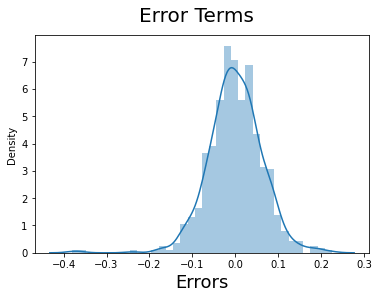

In [107]:
fig = plt.figure()
sns.distplot((y_train - y_train_ridge))
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18) 

its quite a normal graph with errors around 0 and thus validates the Ridge Model

#### Lasso regression

In [108]:
y_train_lasso = lasso.predict(X_train)

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

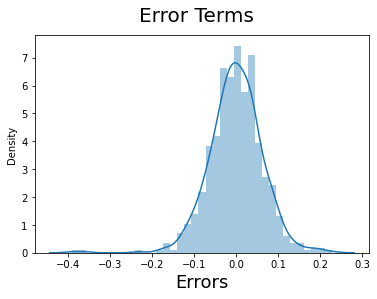

In [109]:
fig = plt.figure()
sns.distplot((y_train - y_train_lasso.reshape(682,1)))
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18) 

its a normal graph with errors around 0 and thus validates the Lasso Model

# Assignment Q3) 

In [111]:
q3 = pd.DataFrame()

In [112]:
q3['Lasso'] = betas.Lasso.apply(lambda x: abs(x))

In [113]:
q3.Lasso.sort_values(ascending=False)

TotalBsmtSF                 0.417034
YearBuilt                   0.183280
GarageArea                  0.142753
TotRmsAbvGrd                0.128753
KitchenQual_TA              0.108699
LotArea                     0.105604
Neighborhood_Crawfor        0.104970
KitchenQual_Fa              0.096124
KitchenQual_Gd              0.095768
Neighborhood_NoRidge        0.091217
Neighborhood_StoneBr        0.089341
MSSubClass_160              0.087946
FullBath                    0.079026
OverallCond_3               0.070588
Neighborhood_Somerst        0.068470
HouseStyle_SFoyer           0.067365
FireplaceQu_Po              0.061932
HouseStyle_1Story           0.061069
Foundation_Wood             0.059976
KitchenAbvGr                0.057910
BsmtQual_No Basement        0.057079
OverallCond_9               0.056436
Neighborhood_IDOTRR         0.053907
BedroomAbvGr                0.052960
OverallCond_8               0.050318
OverallCond_7               0.049998
GarageType_BuiltIn          0.048751
N

In [114]:
X_train_q3 = X_train.drop(columns=['TotalBsmtSF', 'YearBuilt', 'GarageArea', 'TotRmsAbvGrd', 'KitchenQual_TA'])

In [115]:
lassoq3 = Lasso()

model_ridge = cross_val(lassoq3, X_train_q3, y_train)

print(model_ridge.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}


In [116]:
alpha =0.0001

lassoq3 = Lasso(alpha=alpha)
        
lassoq3.fit(X_train_q3, y_train) 

Lasso(alpha=0.0001)

In [117]:
q3_sol = pd.DataFrame(index=X_train_q3.columns)

In [118]:
q3_sol['Lasso'] = lassoq3.coef_

In [119]:
q3_sol

,Lasso
LotFrontage,5.822764e-02
LotArea,1.290443e-01
YearRemodAdd,5.820239e-02
BsmtFinSF1,2.627012e-01
BsmtUnfSF,2.247314e-01
FullBath,1.354248e-01
BedroomAbvGr,1.135519e-01
KitchenAbvGr,-6.578231e-02
MSSubClass_30,-5.001647e-02
MSSubClass_40,-6.144393e-02


In [120]:
q3_sol['lasso_abs'] = q3_sol.Lasso.apply(lambda x: abs(x))

In [121]:
q3_sol.lasso_abs.sort_values(ascending=False)

BsmtFinSF1                  2.627012e-01
BsmtUnfSF                   2.247314e-01
FullBath                    1.354248e-01
Neighborhood_StoneBr        1.309130e-01
LotArea                     1.290443e-01
Neighborhood_Veenker        1.145187e-01
Exterior2nd_Stone           1.137936e-01
BedroomAbvGr                1.135519e-01
MSSubClass_160              1.031465e-01
Neighborhood_NridgHt        9.331111e-02
FireplaceQu_Po              9.173782e-02
Neighborhood_NoRidge        9.020841e-02
Neighborhood_Somerst        8.388620e-02
MasVnrType_No MasVnrType    8.030840e-02
OverallCond_3               7.739218e-02
Neighborhood_Crawfor        7.437570e-02
Neighborhood_IDOTRR         6.840438e-02
Neighborhood_Gilbert        6.763305e-02
KitchenAbvGr                6.578231e-02
GarageType_BuiltIn          6.457683e-02
Exterior2nd_BrkFace         6.425390e-02
MSSubClass_40               6.144393e-02
LotFrontage                 5.822764e-02
YearRemodAdd                5.820239e-02
HouseStyle_2Stor